# Import Libraries

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from PIL import Image

# Load Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Training images shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test images shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


# Plot for each Digit

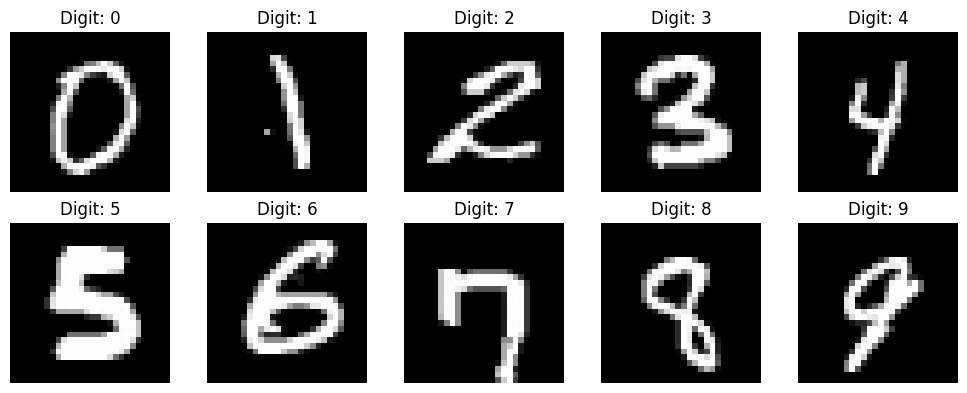

In [3]:
plt.figure(figsize=(10, 4))
for i in range(10):
    indices = np.where(y_train == i)[0]
    random_index = np.random.choice(indices)
    image = x_train[random_index]

    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Digit: {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Image Size

In [4]:
print(f"Size of a single image: {x_train[0].shape}")

Size of a single image: (28, 28)


Κάθε εικόνα στο dataset MNIST είναι μια grey scale εικόνα 28x28 pixel. Όσον αφορά τη σημασία όλων των pixel, ενώ όλα τα pixel συμβάλλουν στη διαμόρφωση του ψηφίου, ορισμένα φέρουν περισσότερες πληροφορίες από άλλα. Τα κεντρικά pixel συχνά καθορίζουν το βασικό σχήμα του ψηφίου, ενώ τα pixel στις ακραίες γωνίες, τα οποία είναι συνήθως μαύρα, ενδέχεται να είναι λιγότερο πληροφοριακά. Ωστόσο, το πλαίσιο είναι σημαντικό. Για τα μοντέλα μηχανικής μάθησης, ακόμη και τα 'κενά' pixel παρέχουν πολύτιμες πληροφορίες σχετικά με τη θέση και την έκταση του ψηφίου εντός της εικόνας.

Οποτε ναι θα έλεγα πως είναι σημαντικά όλα τα pixel της εικόνας ενός ψηφίου.

# Matrix to Vector

In [7]:
image_size = x_train.shape[1] * x_train.shape[2]

x_train_vector = x_train.reshape(x_train.shape[0], image_size).astype('float32')
x_test_vector = x_test.reshape(x_test.shape[0], image_size).astype('float32')

print(f"Shape of x_train after vectorization: {x_train_vector.shape}")
print(f"Shape of x_test after vectorization: {x_test_vector.shape}")

print(f"Example of a pixel value from x_train: {x_train_vector[0, 400:450]}")

Shape of x_train after vectorization: (60000, 784)
Shape of x_test after vectorization: (10000, 784)
Example of a pixel value from x_train: [  0.   0.   0.   0.   0.  81. 240. 253. 253. 119.  25.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  45. 186. 253. 253. 150.  27.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.]


# KNN

Using k values: [5, 15, 51, 244]

Training KNN with k = 5...
Training Accuracy (k=5): 0.9819
Test Accuracy (k=5): 0.9688

Training KNN with k = 15...
Training Accuracy (k=15): 0.9710
Test Accuracy (k=15): 0.9633

Training KNN with k = 51...
Training Accuracy (k=51): 0.9532
Test Accuracy (k=51): 0.9533

Training KNN with k = 244...
Training Accuracy (k=244): 0.9211
Test Accuracy (k=244): 0.9241


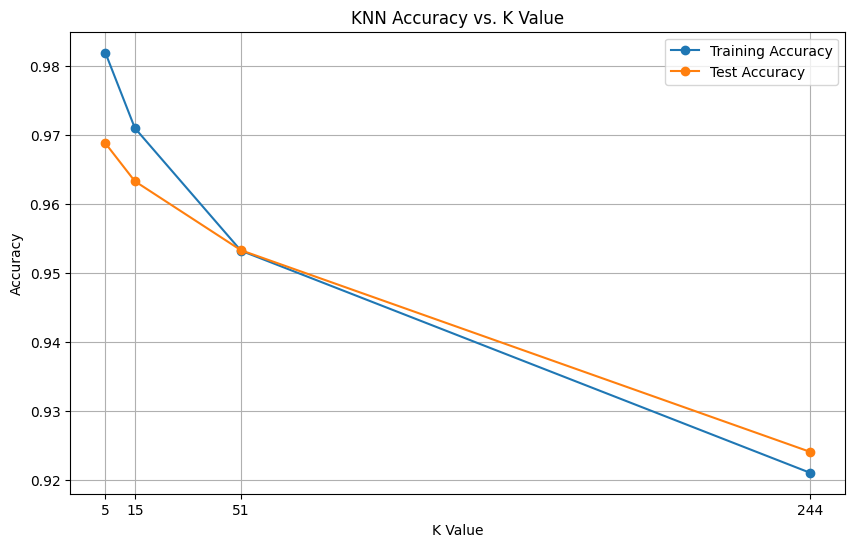

In [9]:
N = x_train_vector.shape[0]
k_sqrt_N = int(np.sqrt(N))
k_values = [5, 15, 51, k_sqrt_N]

train_accuracies = []
test_accuracies = []

print(f"Using k values: {k_values}")

for k in k_values:
    print(f"\nTraining KNN with k = {k}...")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_vector, y_train)

    y_train_pred = knn.predict(x_train_vector)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    print(f"Training Accuracy (k={k}): {train_accuracy:.4f}")

    y_test_pred = knn.predict(x_test_vector)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)
    print(f"Test Accuracy (k={k}): {test_accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(k_values, test_accuracies, marker='o', label='Test Accuracy')
plt.title('KNN Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

# Normalization

In [10]:
image_size = x_train.shape[1] * x_train.shape[2]

x_train_vector_normalized = x_train.reshape(x_train.shape[0], image_size).astype('float32') / 255
x_test_vector_normalized = x_test.reshape(x_test.shape[0], image_size).astype('float32') / 255

print(f"Shape of x_train after vectorization and normalization: {x_train_vector_normalized.shape}")
print(f"Shape of x_test after vectorization and normalization: {x_test_vector_normalized.shape}")
print(f"Example of a normalized pixel value from x_train: {x_train_vector_normalized[0, 400:450]}")

Shape of x_train after vectorization and normalization: (60000, 784)
Shape of x_test after vectorization and normalization: (10000, 784)
Example of a normalized pixel value from x_train: [0.         0.         0.         0.         0.         0.31764707
 0.9411765  0.99215686 0.99215686 0.46666667 0.09803922 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.1764706  0.7294118
 0.99215686 0.99215686 0.5882353  0.10588235 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


Using k values: [5, 15, 51, 244]

Training KNN with k = 5...
Training Accuracy (k=5): 0.9819
Test Accuracy (k=5): 0.9688

Training KNN with k = 15...
Training Accuracy (k=15): 0.9710
Test Accuracy (k=15): 0.9633

Training KNN with k = 51...
Training Accuracy (k=51): 0.9532
Test Accuracy (k=51): 0.9533

Training KNN with k = 244...
Training Accuracy (k=244): 0.9211
Test Accuracy (k=244): 0.9241


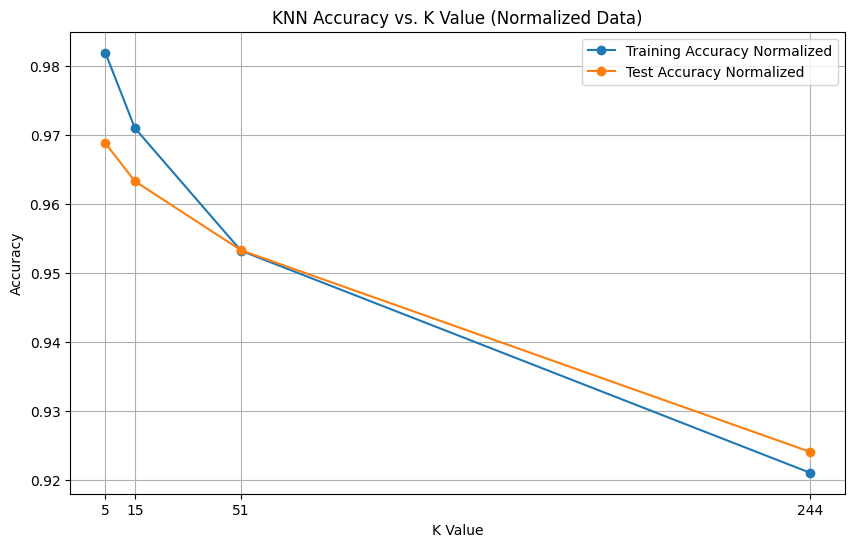

In [46]:
N = x_train_vector_normalized.shape[0]
k_sqrt_N = int(np.sqrt(N))
k_values = [5, 15, 51, k_sqrt_N]

train_accuracies_normalized = []
test_accuracies_normalized = []

print(f"Using k values: {k_values}")

for k in k_values:
    print(f"\nTraining KNN with k = {k}...")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_vector_normalized, y_train)

    y_train_pred_normalized = knn.predict(x_train_vector_normalized)
    current_train_accuracy_normalized = accuracy_score(y_train, y_train_pred_normalized)
    train_accuracies_normalized.append(current_train_accuracy_normalized)
    print(f"Training Accuracy (k={k}): {current_train_accuracy_normalized:.4f}")

    y_test_pred_normalized = knn.predict(x_test_vector_normalized)
    current_test_accuracy_normalized = accuracy_score(y_test, y_test_pred_normalized)
    test_accuracies_normalized.append(current_test_accuracy_normalized)
    print(f"Test Accuracy (k={k}): {current_test_accuracy_normalized:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies_normalized, marker='o', label='Training Accuracy Normalized')
plt.plot(k_values, test_accuracies_normalized, marker='o', label='Test Accuracy Normalized')
plt.title('KNN Accuracy vs. K Value (Normalized Data)')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

# Comparison

In [47]:
print(f"K values: {k_values}")
print(f"Non-normalized Test Accuracies: {test_accuracies}")
print(f"Normalized Test Accuracies: {test_accuracies_normalized}")

K values: [5, 15, 51, 244]
Non-normalized Test Accuracies: [0.9688, 0.9633, 0.9533, 0.9241]
Normalized Test Accuracies: [0.9688, 0.9633, 0.9533, 0.9241]


# My Digit

In [42]:
img = Image.open("custom_digit.png").convert("L")

img = img.resize((28, 28), Image.LANCZOS)

arr = np.array(img) / 255.0
print(arr.shape)

(28, 28)


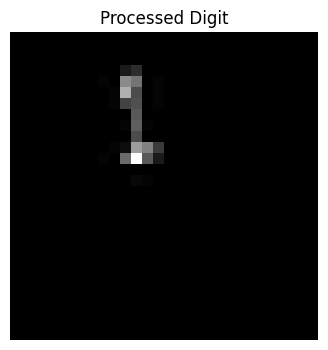

In [44]:
plt.figure(figsize=(4, 4))
plt.imshow(arr, cmap='gray')
plt.title('Processed Digit')
plt.axis('off')
plt.show()

# Classify My Digit

In [45]:
best_accuracy_index = np.argmax(test_accuracies)
k_best = k_values[best_accuracy_index]

print(f"The best k-value based on normalized test accuracies is: {k_best}")
print(f"Training KNN with k = {k_best} on normalized data...")
knn_best = KNeighborsClassifier(n_neighbors=k_best)
knn_best.fit(x_train_vector_normalized, y_train)

image_to_predict = arr.reshape(1, -1)
predicted_digit = knn.predict(image_to_predict)

print(f"Using the best KNN classifier (k={k_best}), the digit is predicted to be: {predicted_digit[0]}")

The best k-value based on normalized test accuracies is: 5
Training KNN with k = 5 on normalized data...
Using the best KNN classifier (k=5), the digit is predicted to be: 1
